In [1]:
import numpy as np
import pandas as pd

from pandas.io import gbq

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

sns.set(style="darkgrid", palette="Set3")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
tags = pd.read_csv('all_levels_playlist_tags_usage.csv', sep='\t')

In [22]:
tags.head()

,playlist_id,Ensemble/Ensemble Configuration/Mariachi Band,Intensity/Low/Low Intensity,Playlist/Time/Month/May,Playlist/Theme/Scary,Playlist/Theme/One Hit Wonder,Artist/Ensemble/Band,Playlist/Time/Century/1400s,Emotion/Attitude/Majestic,Genre/Traditional/Irish,...,Instrument/Wind,Emotion/Negative/Fearful,Emotion/Positive/Blissful,Playlist/Mood/Feeling Good,Playlist/Time/Holiday/New Year,Genre/Pop,Playlist/Activity/Working,Genre/R&B/Soul,Genre/Rock,Playlist/Location/Galaxy
0,3fGdxCiXu9ByRZUA7QeqOD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6IJNg37ejhBbAwfNqe8yme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0XKz5dOHLZQSHWgkn2jL7Q,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0ejM8M3JPmlMK7n5cbg8zl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7iMyUkmPe7epyb8J1mqT9y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tags.shape

(7603, 388)

In [24]:
len(tags.playlist_id.unique())

1441

In [25]:
by_id = tags.groupby(by='playlist_id')

df_clust_id = pd.DataFrame(columns=tags.columns[1:])

for col in tags.columns[1:]:
    df_clust_id[col] = by_id[col].max()

In [26]:
df = df_clust_id.reset_index()
df.head()

,playlist_id,Ensemble/Ensemble Configuration/Mariachi Band,Intensity/Low/Low Intensity,Playlist/Time/Month/May,Playlist/Theme/Scary,Playlist/Theme/One Hit Wonder,Artist/Ensemble/Band,Playlist/Time/Century/1400s,Emotion/Attitude/Majestic,Genre/Traditional/Irish,...,Instrument/Wind,Emotion/Negative/Fearful,Emotion/Positive/Blissful,Playlist/Mood/Feeling Good,Playlist/Time/Holiday/New Year,Genre/Pop,Playlist/Activity/Working,Genre/R&B/Soul,Genre/Rock,Playlist/Location/Galaxy
0,00Ot5pBIr1CuAlAJUivoOK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00e2vXzWaSmxJ1Fga6l2ug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,00ovokuQiZ1iBM5hxFqyxP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00xkZo0UVb5tsXPj2I9DZz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,014Mr2IJhIfZFu6NLYl6nO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df.shape

(1441, 388)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ensemble/Ensemble Configuration/Mariachi Band,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Intensity/Low/Low Intensity,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Time/Month/May,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Theme/Scary,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Theme/One Hit Wonder,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Artist/Ensemble/Band,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Time/Century/1400s,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Emotion/Attitude/Majestic,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Genre/Traditional/Irish,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Contents/New Music/Frontline,1441.0,0.000694,0.026343,0.0,0.0,0.0,0.0,1.0


## Playlist Tag Groups

The idea is to (ideally) have at least one tag from each group assigned to each playlist

* ### Genre


* ### Application:
    * #### Mood
    
    * #### Activity
    
    * #### Theme
    
    * #### Energy:
        * #### Intensity
        * #### Emotion
        
    * #### Time:
        * #### Time of Day
        * #### Day of the Week
        * #### Seasons
        * #### Years
        * #### Decades
        * #### Centuries
    

* ### Tempo:
    * #### Slow
    * #### Medium	
    * #### Fast
    
    
* ### Arrangement:
    * #### A Capella
    * #### Instrumental
    * #### Voice & Music
    
    
* ### Performance:
    * #### Instrument
    * #### Ensemble	
    * #### Voice
    
    
    
* ### Popularity:
    * #### Charts/Hits
    * #### Deep Cuts / B-Sides
    * #### Greatest Hits / Best Of
    * #### Rising / New Music
    
    

* ### Contents:
    * #### Artist Specific
    * #### New Music / Frontline	
    * #### Catalogue
    * #### Mixed (Catalogue and Frontline)

    
    
* ### Artist/Ensemble:
    * #### Solo
    * #### Single Artist
    * #### Multiple Artist	
    * #### Band


### Estimating current tag distributions

Creating the dictionary of playlist tag groups and their ids

In [29]:
tag_group_dict = {
    'genre':['e6576040-ba5a-4f51-b547-3d1ec7005afd','9d557d09-c923-410c-b2c9-3239d073d703','6dc2a882-8bf6-423e-a9e8-07615ac91154','195e1e65-82e9-4a49-96de-fca22301027e','da8a990f-9398-483d-8284-80d01c4ef634','f814d27a-2e75-48a7-b2aa-731e6e0ac95a','c9827769-5b34-4403-8921-eb103f322fbf','a6e9ef88-0f2e-4624-9275-34fdcfaea7b2','e31d4b6d-eadb-4ddd-a97f-37137642f571','fe067718-5430-4128-ab4f-7d571e2b4de9','2fa3f860-6f34-4464-81ad-7cc62a0c8696','3ffa3c14-6b46-4295-9618-77b1de08c9b6','fe776e3d-dbcb-424e-b70d-9487131080e6','5ae853d5-88f8-44d3-9d00-f002dcc44029','325348e8-17d8-4c15-9c4d-75f5fdafdc49','c38b1c5d-43c2-4381-b103-1558a081c5d9'],
    'application_mood':['7bc01dab-0710-4b0b-99e7-d3ab6f377995','ad312d5e-b048-48b2-a863-a0625e4471f3','ae1e5ecd-ef60-4e2b-9a5b-4b8589aa806c','e5e4815d-40f2-40cf-8457-50f1da3e42f5','fc7eaf4e-cc51-4c2e-aa0c-31a472436381','3dec689f-737a-4a99-8cfb-5e2d9ab3d7b2','cf96216b-70d0-4563-bc5f-2de288e35972','5ae76cf7-35c2-44f4-abfb-5af2508430b5','2c5f62b7-383b-479c-96b8-f93ef42c6b2c','b879077a-d94e-4911-b7c8-85edbc1d8aac','8ee6194c-d53a-450f-b32a-eac8d48216e4','f0ad0faf-069e-407f-9fd3-0d1cf4809b90','869edfab-7236-4cc3-8f39-4d0c549412d2','0b7cc25a-2cd5-4c1f-846d-3a6f8d865e34','ac74433c-b25f-4a80-ae24-f7d1544d2f32','c7b7db44-de02-4fd5-a020-21650b009190','a2b3818e-b536-4a1e-b1eb-15be04f4c2d1','e35613af-7833-455a-b6b6-9afeef9d95aa','bbdcf68a-a88b-4be7-91f9-da4a1856753d','a21d9b80-b19e-480a-a714-25e2f3ad3bb8','4d10a80e-1221-4679-9ac8-7fd55c9c7da3','480fa9ae-670c-4044-ae56-b6c2f2c2da0a','77889d6d-8058-4c76-a4af-3bf5c586c750','1e078bfd-480e-4d44-93a1-ad5d7a3a48be','286340ad-1b0e-414d-b8ba-4755bbbd31fc','7efef582-eabd-4bea-9bd9-d615a80f7aec','4592900c-3bef-4f5a-b78d-766ff4b9725d'],
    'application_activity':['8c9aee2d-9c84-42e6-8f40-aaa1c6d3a3cf','b2f09caf-4629-4bda-9153-03a067006c3f','ef0fce48-7185-4783-97ff-6bacc4ca5d51','1df6d354-688f-45a6-b3be-2ccb62a76ce0','aa9bf721-64f1-47b2-87ff-e47f480d8889','8fb8ad4e-f124-4ce7-9c28-1cfbf328d81b','57924078-3ef2-4611-abaf-9f9e9757f30b','9d394a18-1946-4b33-8a44-65fab2a5f42c','4845c08d-550c-4c8f-8acc-839ea80c8106','bedfd360-75a1-48f4-a043-95af261d7b7b','b93419c0-8b40-4106-bebb-fda732667479','6d716484-86ed-47c2-ae3d-80c85e22b54a','8bf3cad9-d526-438b-b286-c1796943e7ec','d2cc9a22-907d-4231-a0ea-e80fe515583d','3876b94c-446a-4b52-8e30-c45748e74729','c775d122-4050-4cda-b3dd-413df2136876','fe22b1ad-e8fc-4156-8cae-ec9e6ed098de','3d254750-444a-4e0d-a1ec-89afb7bc7e35','a189596b-d4b3-4b83-8466-8496349eb35a'],
    'application_theme':['b0438e86-1908-420c-a265-f5be4c4f60a2','ef591634-dacf-48c7-b447-873cc3ddb365','04d06dab-fdb0-4943-81ba-0efe10501ea6','ae8e437e-93cf-46a8-8829-97a75be688fd','e58155ec-e01a-4686-a305-0a6fe0af9df8','83680997-9efb-46d1-bca6-94f1666483d6','12d9f73c-14c5-44de-9f26-37133ab44430','8e9281d6-208d-4930-808f-9c7e27be9c24','d26585f3-51c0-4a2f-a7ed-6a6a67e942d7','58df6c95-c037-483a-86f9-d80f8449079e','c699476a-6997-44c9-8d57-fc53d4d2c406','6c151504-29ec-4284-9bc5-17237367eedd','1a61eec8-79fd-4ecf-9c95-75061d67dc05','598d9a03-2222-4300-9cdc-b034ef5cb12a'],
    'time':['4bc46368-4b1c-4476-afc7-6fdc9d656082','0d4fa530-244a-4bb5-8aa5-06f39d3c1dab','1a91740d-8daf-49c2-aa1e-d3983e3e3183','a0308d61-8fbc-49be-a81f-911386859382','1eb92685-de75-4ec5-84f8-5aadab43726f','40fe98dd-44b9-4898-8e04-2b522f09d8de','72db20b4-c1af-4a74-a817-0640ff13f258','b27877a1-803c-4080-986f-81b21ba581c2','bb820d23-5607-4c87-bc85-a160a12d6cb7','e2ef4090-5051-4668-b88d-24c327f2fc04','cb1fc0f4-2242-41dd-a4be-9e7ff402726d','2d587d1c-5e28-40d7-8fd1-39d4679517f4','b293f22b-68c3-4aae-b946-31f92e7bdcda','3439ec13-0454-4d49-b3ba-923b30b5f1b0','6af5cff5-bd87-4f47-ab9c-5145c5a25e1b','2f8614d5-9578-4826-8605-32cb564df759','de5910f3-ca49-4d8c-a44a-180fd1a2ba63','7370dea5-263d-465f-a661-b85753c89faa','1b64b93c-1da9-4d28-9cdf-191ef2ff3b7a','034843c2-508d-484f-84d5-60434f4f8b8e','4bb35fba-d48a-42ed-bd77-0460e345c425','47c881f8-a64c-469b-9d9b-aa3c26d98161','7f1816a2-8005-4130-8329-5b8dec8db4a4','661dfa2c-2b99-429a-9114-e3033c37cd39','3d6fb8b7-bcd8-4910-a630-8cf88f1c6bbf','f496d202-10c3-4c97-9bc4-5d106ce660dc','7887735f-708d-455d-b643-e80aa73b5442','7463db5a-6c01-48d6-935c-151cbc8b0932','f011d90b-5bf0-4160-b988-a497d8148331','ba153f03-d919-4530-a047-df099cd7f52f','3a9af649-2c28-4a1e-8ab0-3a7e2aef334d','5ad2a8ed-8dde-48fc-b497-07dc13b5be89','5b5caef7-caa9-40e7-b252-ea48790bf88a','9dccb91f-2147-4f33-a5e1-c352863b4b3d','c3de98f1-f82d-4c9f-9d93-e4c1f84a43db','9a2280e6-abd2-43da-9180-b7970e2d9a83','3e54f151-1c6a-4b30-87e5-8773c3c97956','a04a48f4-1b2c-460d-940a-764031af07af','62b4361e-3d89-46ba-a1e1-8147933948fe','5bef664b-c15e-4f22-89c8-ac1677b863df','fd10eb0e-cc10-40d6-bedb-462919a64f37','200a7d95-08e6-4d03-ab90-364c599a5593','81c01ef1-669e-463f-a917-31782e5fc985','d851e4b4-9b89-49b7-b676-80b669251342','207977a7-d653-498d-89b3-e0c3721728a4','870991ad-d08f-4cf3-8bc8-e0ab03989145','f6c72e40-a801-4380-a94e-8294f706fe51','eeace084-1de5-4cad-81b7-ad138279cba0','91ce3f27-03a7-4314-a53b-75a5568b6bcc','19f98dce-751e-4a47-a8e9-81ea41c04ae8','1bb61928-bc22-41ec-be81-de49f02d1db9','7701c47f-8827-4a93-a9ca-5d0c39e973b2','5996380a-3a38-4fef-aebe-f5b77e48c314','3a257e13-bf56-434f-af9d-c2ed1bfdefb9','9cb184d1-adb2-4da7-ae7c-e7a4c8d84084','26f9a17a-3268-4bf5-a8e6-526c9cc7dee3','cb40e151-d928-4994-8751-094601a81dbe','075c709f-25c2-47f4-839a-a073574ac4d7','8b110a00-6770-464a-a730-557641727c65','f67bc32a-736a-4e2a-9bc5-c904dc587dd6','f6d5748b-3010-4dfa-b3f1-be716ab9e796','43370fc4-7052-42bc-9d6d-cdafc73b8327','b3ed8e5b-3172-4bff-9969-bc805f434f9e','3b5def46-6158-449b-ac2c-fca3782c2006','55b79937-5743-45d3-bf9e-d985065dc0b9'],
    'energy_intensity':['6a257253-539a-40f8-b7e6-4244f414428c','17f84b01-f701-40e6-8363-d365a009fb62','787fee32-5747-41b1-87b3-aa319bb66478'],
    'energy_emotion':['c87d55e8-ef67-4857-aaf6-ebd33665e675','142a3cd9-007c-4029-b07d-f8fe076916f7','2392a959-c77a-4832-b2e5-8616d58d8602','1b75c332-c638-43a9-a8c8-b86d7ac08d8f','5f7a98cd-6b9b-4481-83e4-a3e5a5272ff8','c11b4ff8-c8f1-4b07-bb0e-63110bca44c9','41d64f6e-5214-47cc-a2f6-81e02f59485a','a778d762-50ba-4144-b6b1-b12589347cf6','8d5907f4-d38c-4ac2-b0e1-06ddd6a6088a','8c642c9e-44ec-4557-9b9c-67726cc94ae4','1dd9fb0c-7d7b-41f0-b6a4-f95e5f1656a5','07744b0b-6c6b-40f7-ac35-d13eaee0b054','dade5c27-4687-4721-94b0-55116306b792','d6eaf559-7c82-48d4-8eea-e6368f755c72','dce29583-3450-4c67-8df4-2ce857658307','5eb43531-159c-44d2-bd75-08a8fa80f2c4','bad29696-e4bf-4b51-b2b9-11298c11d359','59db0a66-7a32-4970-96cf-a1deaa73dc2c','735a81a7-0514-4fd5-9d0a-6bb766015c08','3a305083-4df7-4780-a73f-6943ad894a08','85a4e4c5-879a-4f89-9b7f-7439b4d41932','fba6c7c6-edfc-466f-86d2-1bdfbc401050','d0e0d85b-6f71-435b-ba9c-101b0f59339e','4848d188-6ef4-4bb3-a385-74633ee6ae77','77822969-740e-4f56-9ea0-09de404dc071','fbc5ed78-243f-46df-bae7-577492d554dc','64f3dd77-922e-4461-927f-d11e9078c5ad','1e6e63c6-15dd-4767-9f0e-84d51a17091b','89a8d7be-46bb-49e6-88e8-21c866598f05','6348bce7-e3fb-4e89-8667-adc7ab8103db','5c55f7dd-506b-4310-9cfc-fd9242aa884e','61987cf6-d75a-4f56-a643-84aa4dd4f1f3','1d120cf1-e28a-4c97-b867-117a4662f128','9741eee3-4efe-4f60-b14e-2bc932c304a2'],
    'tempo':['81d65be3-1438-43fb-9ca1-82414d1e9930','76c2f4a0-9e78-4c48-b9bf-4864e9957c3a','925b6056-30e6-4554-9e69-51835f2170e0'],
    'arrangement':['343f284f-06d7-47b7-8b9b-076c4511e998','ad19f314-c5c6-4de8-bba5-4456577b4300','df112352-99b1-4cda-b46b-6b68d97ed796'],
    'performance':['dffec3b6-6cbd-45c0-b928-982cecec3b80','23376d10-127f-4344-8ef3-931f9dec6073','a239ac45-c254-4bdd-8f0b-c226540374ef','64b277d8-6f18-40c3-9d02-7d966012d0cb','5cb95c9c-218c-4f58-afc3-31761db79513','b6f4276a-75df-4904-a61e-76b61dd0e3e0','7a8e0421-9fa2-4b4b-a9d4-e219df4a4ca5','5046064b-b6f4-416e-b106-1e40270b5f98','327038c7-436f-4795-b93a-a70f23906e47','ada66447-1442-4b2d-afca-4dfc1b66ac32','84f755f6-4664-414c-8eec-e706fa035511','92a26e27-622b-47f6-89a5-09c67c0a402e','ecfb6720-8466-4fc1-a93e-a06f80990f8a','fac24212-3fd7-4bbe-81c1-0c0560b29a2b','e163d399-695f-4c33-8fff-f0a83771f8c9','614a1d4c-3d57-44db-b58e-35c9dd4baf3d','4966b1fa-d7a7-4313-ae1a-29c878a17a43','28c26d19-a654-47ee-b1ca-48b046ef6a0e','52c7410b-ee65-47b6-aa96-ccecea65d597','3d0e1ae7-2dd4-4219-ad2a-ec9fc52810f2','623285f8-9899-4f45-9862-e4892b48c2aa','b9bf9935-e5f4-4cfa-a343-df7fd962d840','550d58f0-c494-4d82-8c94-ab9aa671ba64','24084cdf-1b4f-4e45-99a0-5242ec9a9739','000cc4ca-6de4-4d7e-82a8-95093105e421','351913ae-1a41-4cb6-9cea-1f42c88daba3','c3aa328a-3d05-4785-a4ca-5e49492c680a','ddb813d8-3410-43ce-8e1a-f2c9b047ff49','37bb3e30-63f2-491d-9fdf-50214e700985','9c79b703-bb9c-4cc8-9b64-cd3b1512f6ef','6df35aeb-4c6f-448e-8d14-1967aa24a098','e071c631-a8b9-4851-82d9-9e6c1f146572','307b7caa-ef37-4647-be18-5f4409065046','b1eb3b83-adb1-4cd0-93fd-c1fe815ffed4','4e0c2807-f4e8-4c4b-be84-9aaba351d07c','1ec4d2a1-efe9-4394-9802-24627dc4e0d9','90e2e1af-4d28-405b-b524-59eba430094c','59b805ef-7097-43c1-b9fc-27490e802505','bdeb3512-f0d2-4d96-b24c-7d71a8654c05','6d36b370-263a-49e2-a87a-b991e07d3283','1461d992-66fe-4af0-aeeb-d611d324faa2','c4783294-386f-40da-af3a-16e8edaa0396','8c0f8abf-174c-444e-b6d6-6555c19aa0a6'],
    'popularity':['99025420-177d-4211-a9ee-c917dbee61dd','6c4ef1c1-b42c-43d6-a142-ff31c7b9868c','0a0bdffd-1883-4e04-ade1-13d20e47822d','75d6c1f4-abe5-425f-8a3f-90b013501a06'],
    'contents':['df690a94-45b6-482c-bdb7-e98718c73dfe','82b7ed8b-a630-4ecd-9b90-3b13de3d1868','096abec2-2f9a-46d5-b395-9222a1856a2c','d8925492-4438-415f-ac4e-b192a4830e4d'],
    'artist_ensemble':['07490913-8d97-4494-91e2-9624e9bb278b','75e6f872-6187-40fa-ac2b-66c2a33eca9f','b6bf1c62-3927-4019-aefd-caa9ca346a47','2a9ab7f1-94ca-495b-88e6-71e6367fc4d4'],
}

In [30]:
count = 0

for key, value in tag_group_dict.items():
    count = count + len(value)
    
print(count)

239


In [31]:
taxonomy_data_playlists = gbq.read_gbq('SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.amplify_taxonomy_playlists`',
    project_id='umg-comm-tech-dev', dialect='standard')
taxonomy_data_playlists.head()

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
0,Genre,Gospel,None,Sung Christian music with roots in traditional...,Classic Gospel,true,9e70e1a7-3e64-4704-9175-f5069732a97a,Genre/Gospel/Classic Gospel
1,Genre,None,None,Characterized by a loose narrative lyrical sty...,Blues,true,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues
2,Genre,None,None,Traditional Western art music. Though wide-ran...,Classical,true,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical
3,Genre,None,None,Characterized by the use of guitar and twangy ...,Country,true,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country
4,Genre,None,None,Created primarily by electronic instruments an...,Electronic,true,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic


In [32]:
taxonomy_id_dict = dict(zip(taxonomy_data_playlists.taxonomynodeid,taxonomy_data_playlists.path))

In [33]:
df[taxonomy_id_dict['e6576040-ba5a-4f51-b547-3d1ec7005afd']].sum()

56

In [34]:
tag_coverage = pd.DataFrame(columns=['tag_family','tag_id','tag_name','tag_playlist_count'])

tag_family_list=[]
tag_id_list=[]
tag_name_list=[]
tag_playlist_count_list=[]

for key, id_list in tag_group_dict.items():
    print('Investigating coverage for tags in ', key)
    for tag_id in id_list:
        tag_name = taxonomy_id_dict[tag_id]
        tag_count = df[tag_name].sum()
        
        tag_family_list.append(key)
        tag_id_list.append(tag_id)
        tag_name_list.append(tag_name)
        tag_playlist_count_list.append(tag_count)
        
tag_coverage['tag_family'] = tag_family_list
tag_coverage['tag_id'] = tag_id_list
tag_coverage['tag_name'] = tag_name_list
tag_coverage['tag_playlist_count'] = tag_playlist_count_list

tag_coverage.head()

Investigating coverage for tags in  genre
Investigating coverage for tags in  application_mood
Investigating coverage for tags in  application_activity
Investigating coverage for tags in  application_theme
Investigating coverage for tags in  time
Investigating coverage for tags in  energy_intensity
Investigating coverage for tags in  energy_emotion
Investigating coverage for tags in  tempo
Investigating coverage for tags in  arrangement
Investigating coverage for tags in  performance
Investigating coverage for tags in  popularity
Investigating coverage for tags in  contents
Investigating coverage for tags in  artist_ensemble


,tag_family,tag_id,tag_name,tag_playlist_count
0,genre,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues,56
1,genre,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical,94
2,genre,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country,42
3,genre,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic,147
4,genre,da8a990f-9398-483d-8284-80d01c4ef634,Genre/Folk,50


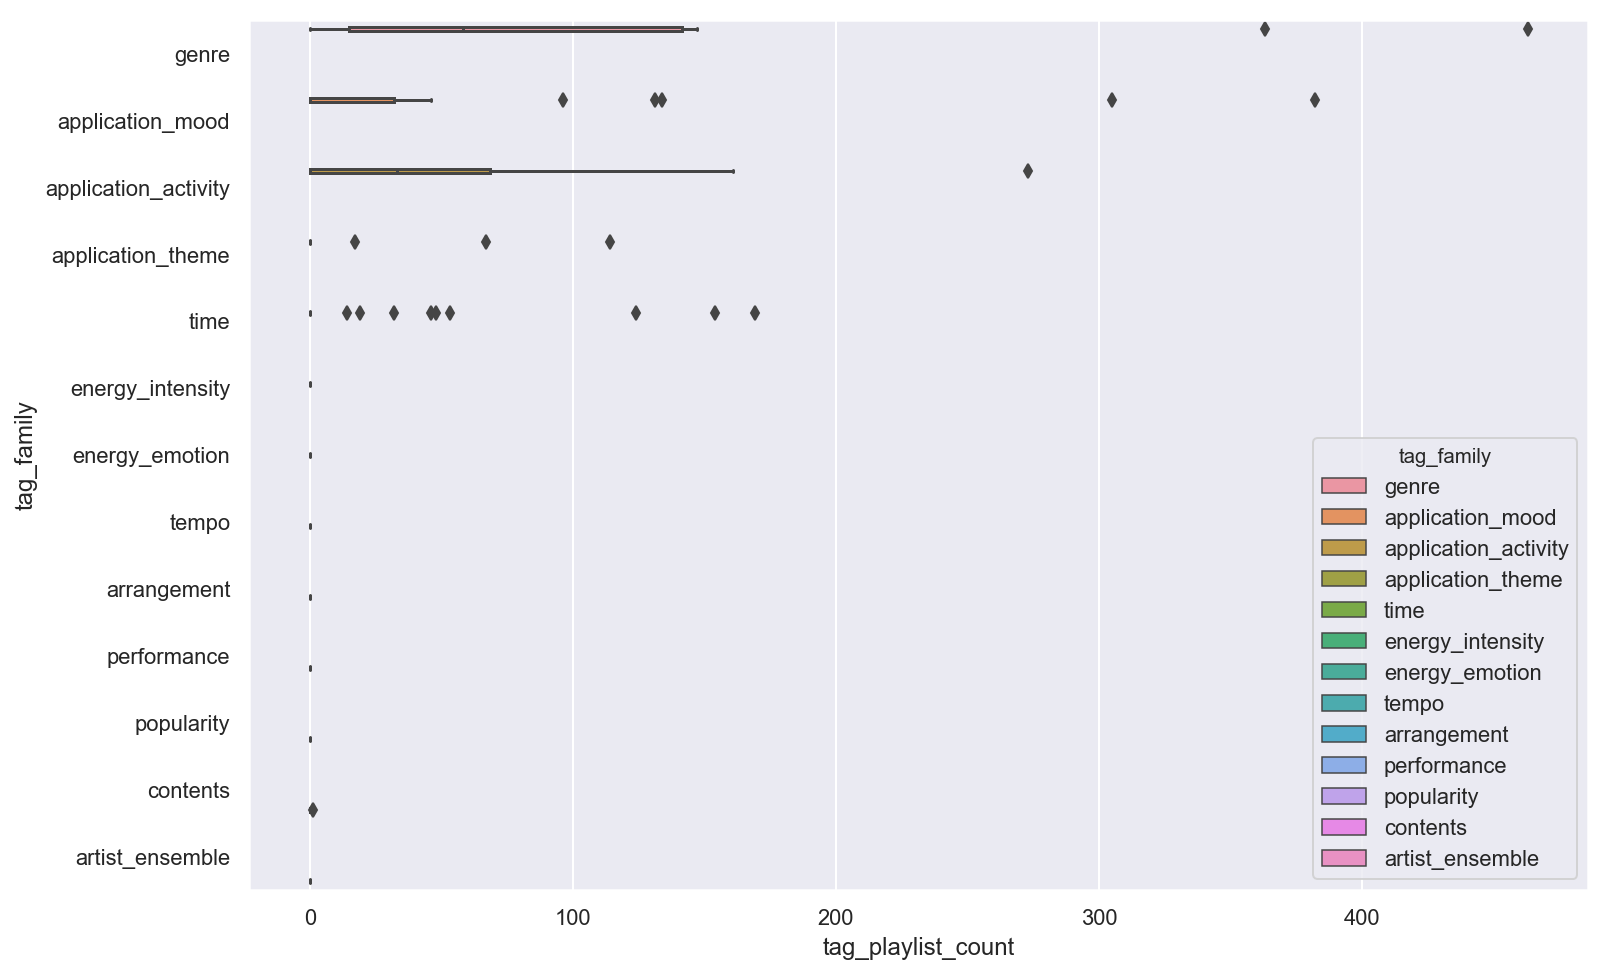

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

sns.boxplot(data=tag_coverage, x='tag_playlist_count', y='tag_family', hue='tag_family')

plt.show()

In [36]:
tag_coverage.groupby(by='tag_family').tag_playlist_count.describe()

,count,mean,std,min,25%,50%,75%,max
tag_family,,,,,,,,
application_activity,19.0,49.421053,70.090668,0.0,0.00,33.0,68.50,273.0
application_mood,27.0,42.888889,95.664210,0.0,0.00,0.0,32.00,382.0
application_theme,14.0,14.142857,33.938535,0.0,0.00,0.0,0.00,114.0
arrangement,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
artist_ensemble,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
contents,4.0,0.250000,0.500000,0.0,0.00,0.0,0.25,1.0
energy_emotion,34.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
energy_intensity,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
genre,16.0,103.687500,132.205254,0.0,14.75,58.0,141.50,463.0


In [37]:
tag_coverage.groupby(by='tag_family').tag_playlist_count.sum()

tag_family
application_activity     939
application_mood        1158
application_theme        198
arrangement                0
artist_ensemble            0
contents                   1
energy_emotion             0
energy_intensity           0
genre                   1659
performance                0
popularity                 0
tempo                      0
time                     659
Name: tag_playlist_count, dtype: int64

In [38]:
df.sum(axis=1).describe()

count    1441.000000
mean        5.276197
std         3.652822
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        20.000000
dtype: float64

## Building more tags

In [14]:
tags_playlists = gbq.read_gbq('SELECT * FROM `umg-comm-tech-dev.adhoc.amplify_analysis` WHERE tagged_entity_type="StreamingPlaylist"',
    project_id='umg-comm-tech-dev', dialect='standard')
tags_playlists.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,3fGdxCiXu9ByRZUA7QeqOD,,Genre/R&B,Funk,8a7b0f84-823d-4905-8471-574de982d71c,Manual,1.0
1,StreamingPlaylist,6IJNg37ejhBbAwfNqe8yme,,Genre/Rock,Punk,a80ba8b4-c477-491b-b1e8-818c7b82efd6,Manual,1.0
2,StreamingPlaylist,0XKz5dOHLZQSHWgkn2jL7Q,,Application/Playlist/Activity,Sleeping,d2cc9a22-907d-4231-a0ea-e80fe515583d,Manual,1.0
3,StreamingPlaylist,0ejM8M3JPmlMK7n5cbg8zl,,Application/Playlist/Activity,Sleeping,d2cc9a22-907d-4231-a0ea-e80fe515583d,Manual,1.0
4,StreamingPlaylist,7iMyUkmPe7epyb8J1mqT9y,,Application/Playlist/Time/Holiday,Christmas,c3de98f1-f82d-4c9f-9d93-e4c1f84a43db,Manual,1.0


### Artist/Ensemble

All playlists with 3 or less artists - single artist

In [15]:
create_spotify_playlists = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.playlists_create_spotify`
"""

In [16]:
pl_universe = gbq.read_gbq(create_spotify_playlists, project_id='umg-comm-tech-dev', dialect='standard')
pl_universe.head()

,playlist_id,nartists,nalbums,maxpos
0,7jnq1oK7S6Xw4eAlh1NvUn,1,1,10
1,4o78SbI3E5nCs6UmlocRha,95,188,275
2,7vDdx1PnBUanKS2pNUBwoY,2,1,20
3,3EEyQ5PYlEjon7cudhhbBL,1,1,21
4,5qIQS9RpyuESMZBCO9FSqT,1,1,22


In [17]:
pl_universe.shape

(1655, 4)

In [32]:
single_artists = [1,2]
single_albums = [1,2]

In [39]:
#pl_universe[pl_universe.nartists==3]

In [40]:
single_artists = list(set(pl_universe[pl_universe.nartists<4].playlist_id.unique()))

In [41]:
taxonomy_data_playlists.head()

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
0,Genre,Gospel,None,Sung Christian music with roots in traditional...,Classic Gospel,true,9e70e1a7-3e64-4704-9175-f5069732a97a,Genre/Gospel/Classic Gospel
1,Genre,None,None,Characterized by a loose narrative lyrical sty...,Blues,true,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues
2,Genre,None,None,Traditional Western art music. Though wide-ran...,Classical,true,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical
3,Genre,None,None,Characterized by the use of guitar and twangy ...,Country,true,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country
4,Genre,None,None,Created primarily by electronic instruments an...,Electronic,true,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic


In [42]:
taxonomy_data_playlists[taxonomy_data_playlists.path=='Artist/Ensemble/Single Artist']

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
52,Artist/Ensemble,None,None,None,Single Artist,true,b6bf1c62-3927-4019-aefd-caa9ca346a47,Artist/Ensemble/Single Artist


In [43]:
taxonomy_data_playlists[taxonomy_data_playlists.path=='Artist/Ensemble/Multiple Artist']

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
51,Artist/Ensemble,None,None,None,Multiple Artist,true,75e6f872-6187-40fa-ac2b-66c2a33eca9f,Artist/Ensemble/Multiple Artist


In [44]:
artist_ensemble_new_tags = pd.DataFrame(columns=tags_playlists.columns)

In [45]:
playlist_id_list = []
tag_id_list = []
tag_value_list = []

for playlist_id in pl_universe.playlist_id:
    playlist_id_list.append(playlist_id)
    if playlist_id in single_artists:
        tag_id_list.append('b6bf1c62-3927-4019-aefd-caa9ca346a47')
        tag_value_list.append('Single Artist')
    else:
        tag_id_list.append('75e6f872-6187-40fa-ac2b-66c2a33eca9f')
        tag_value_list.append('Multiple Artist')
        
artist_ensemble_new_tags['playlist_id']=playlist_id_list
artist_ensemble_new_tags['isrc']=''
artist_ensemble_new_tags['path']='Artist/Ensemble'
artist_ensemble_new_tags['value']=tag_value_list
artist_ensemble_new_tags['taxonomy_node_id']=tag_id_list
artist_ensemble_new_tags['source']='Auto'
artist_ensemble_new_tags['confidence']=0.9
artist_ensemble_new_tags['tagged_entity_type']='StreamingPlaylist'
artist_ensemble_new_tags.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,7jnq1oK7S6Xw4eAlh1NvUn,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9
1,StreamingPlaylist,4o78SbI3E5nCs6UmlocRha,,Artist/Ensemble,Multiple Artist,75e6f872-6187-40fa-ac2b-66c2a33eca9f,Auto,0.9
2,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9
3,StreamingPlaylist,3EEyQ5PYlEjon7cudhhbBL,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9
4,StreamingPlaylist,5qIQS9RpyuESMZBCO9FSqT,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9


In [46]:
artist_ensemble_new_tags.shape

(1655, 8)

In [47]:
artist_ensemble_new_tags.value.value_counts()

Multiple Artist    1242
Single Artist       413
Name: value, dtype: int64

In [48]:
artist_ensemble_new_tags.to_gbq('playlist_sequencing.new_tags_artist_ensemble', project_id='umg-comm-tech-dev',
                               if_exists='replace')

1it [00:07,  7.04s/it]


### Getting track level metadata

In [79]:
get_playlists_track_listings = """
SELECT
  pl.playlist_id,
  MAX(ph.playlist_name) AS playlist_name,
  MAX(ph.playlist_owner) AS playlist_owner,
  MAX(ph.playlist_description) AS playlist_description,
  MIN(ph.follower_count) AS min_follower_count,
  MAX(ph.follower_count) AS max_follower_count,
  pl.maxpos,
  pl.nalbums,
  pl.nartists,
  MIN(th.playlist_date) AS min_track_date,
  MAX(th.playlist_date) AS max_track_date,
  th.isrc,
  MIN(th.track_position) AS min_track_position,
  MAX(th.track_position) AS max_track_position,
  AVG(th.track_position) AS avg_track_position,
  STDDEV(th.track_position) AS std_track_position,
  th.track_artist,
  th.track_title,
  MAX(th.track_add_by) AS track_add_by
FROM
  `umg-comm-tech-dev.playlist_sequencing.playlists_create_spotify` pl
LEFT JOIN
  `umg-edw.spotify.playlist_track_history` th
ON
  pl.playlist_id = th.playlist_id
LEFT JOIN
  `umg-edw.spotify.playlist_history` ph
ON
  pl.playlist_id = ph.playlist_id
WHERE
  th.playlist_date >= "2019-01-01"
  AND th.playlist_date < "2019-07-01"
  AND ph.playlist_date >= "2019-01-01"
  AND ph.playlist_date < "2019-07-01"
GROUP BY
  pl.playlist_id,
  pl.maxpos,
  pl.nalbums,
  pl.nartists,
  th.isrc,
  th.track_artist,
  th.track_title
"""

In [2]:
get_spotify_metadata = """
SELECT
  track_isrc AS isrc,
  MAX(t.first_artist_spotify_id) AS spotify_artist_id,
  MAX(t.duration_ms) AS duration_spotify,
  MAX(t.popularity) AS song_popularity_spotify,
  MAX(sa.popularity) AS artist_popularity_spotify,
  MAX(followers) AS artist_followers_spotify,
  MAX(genres) AS artist_genres_spotify,
  MAX(stm.artist_name) AS artist_spotify,
  MAX(stm.track_name) AS title_spotify,
  MAX(label) AS label_spotify
FROM
  `umg-partner.spotify.spotify_track_metadata` stm
LEFT JOIN
  `umg-alpha.spotify_metadata.tracks` t
ON
  stm.track_isrc = t.isrc
LEFT JOIN
  `umg-alpha.spotify_metadata.spotify_artists` sa
ON
  t.first_artist_spotify_id = sa.spotify_id
WHERE
  track_isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
  GROUP BY
    isrc)
GROUP BY
  isrc
"""

In [3]:
get_apple_meta = """
SELECT
  isrc,
  MAX(artist_name) AS artist_apple,
  MAX(title) AS title_apple,
  MAX(p.release_artist) AS r2_artist,
  MAX(p.r2_release_title) AS r2_title,
  MAX(label_studio) AS label_apple,
  MAX(major_label),
  MAX(slw.original_release_date) AS release_date,
  MIN(earliest_master_track_release_date) AS master_track_release_date,
  MAX(slw.genre_name) AS genre_apple,
  MAX(slw.parent_genre_name) AS parent_genre_apple,
  MAX(p.genre_name) AS genre_r2,
  MAX(dcm.duration) AS duration_apple,
  MAX(song_rank) AS track_popularity_apple
FROM
  `umg-alpha.epf.song_label_view` slw
LEFT JOIN
  `umg-edw.metadata.mdm_product` p
USING
  (isrc)
LEFT JOIN
  `umg-alpha.epf.song_match`
USING
  (isrc)
LEFT JOIN
  `umg-alpha.epf.song` s
USING
  (song_id)
LEFT JOIN
  `umg-alpha.epf.song_popularity_per_genre` sp
USING
  (song_id)
LEFT JOIN
  `umg-partner.apple_music.daily_content_metadata` dcm
USING
  (isrc)
WHERE
  slw.isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
  GROUP BY
    isrc)
GROUP BY
  isrc
"""

In [49]:
get_tracks = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
"""

In [50]:
tracks = gbq.read_gbq(get_tracks, project_id='umg-comm-tech-dev', dialect='standard')
tracks.head()

,playlist_id,playlist_name,playlist_owner,playlist_description,min_follower_count,max_follower_count,maxpos,nalbums,nartists,min_track_date,max_track_date,isrc,min_track_position,max_track_position,avg_track_position,std_track_position,track_artist,track_title,track_add_by
0,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-01-25,2019-05-26,QMJMT1902056,2,49,21.737288,12.852411,J. Cole,MIDDLE CHILD,
1,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-06-27,2019-06-29,USWB11901154,41,50,46.333333,3.862170,Ali Gatie,It's You,
2,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-01-01,2019-04-07,USWL11801206,11,50,26.010417,11.410754,Paulo Londra,Adan y Eva,
3,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-01-08,2019-03-15,QZ45A1700126,16,50,34.888889,10.066348,21 Savage,a lot,
4,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-05-05,2019-05-31,USAT21901897,26,49,40.038462,6.346362,Bazzi,Paradise,


In [51]:
tracks.shape

(168050, 19)

In [52]:
len(tracks.isrc.unique())

79775

In [4]:
get_meta_apple = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.track_apple_meta`
"""
get_meta_spotify = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.track_spotify_meta`
"""

In [43]:
path =r'/Users/meshchd/development/umg/umg-backup/playlist_sequencing/metadata/'
all_files_apple = glob.glob(path + "adhoc_apple_*.csv")

In [44]:
apple_meta = pd.concat((pd.read_csv(f) for f in all_files_apple), ignore_index=True)
apple_meta.head()

,isrc,artist_apple,title_apple,r2_artist,r2_title,label_apple,major_label,release_date,master_track_release_date,genre_apple,parent_genre_apple,genre_r2,duration_apple,track_popularity_apple
0,GB28K1100036,David Guetta,Titanium (feat. Sia),David Guetta,NaN,Rhino,Warner,2013-12-13,2012-02-13,Fitness & Workout,Fitness & Workout,Pop,246.0,81.0
1,GB28K1100036,David Guetta,Titanium (feat. Sia),David Guetta,NaN,Rhino,Warner,2013-12-13,2012-02-13,Fitness & Workout,Fitness & Workout,Pop,245.0,16.0
2,GB28K1100036,David Guetta,Titanium (feat. Sia),David Guetta,NaN,Rhino,Warner,2013-12-13,2012-02-13,Fitness & Workout,Fitness & Workout,Pop,245.0,75.0
3,DEUM70805717,Die kleine Schnecke Monika Häuschen,Die kleine Schnecke Monika Häuschen - Titellied,Die kleine Schnecke Monika Häuschen,NaN,Karussell,UMG,2009-03-06,2008-10-10,Spoken Word,Spoken Word,Other,114.0,NaN
4,DEUM70805717,Die kleine Schnecke Monika Häuschen,Die kleine Schnecke Monika Häuschen - Titellied,Die kleine Schnecke Monika Häuschen,NaN,Karussell,UMG,2009-03-06,2008-10-10,Spoken Word,Spoken Word,Other,115.0,NaN


In [45]:
path =r'/Users/meshchd/development/umg/umg-backup/playlist_sequencing/metadata/'
all_files_spotify = glob.glob(path + "adhoc_spotify_*.csv")

In [46]:
spotify_meta = pd.concat((pd.read_csv(f) for f in all_files_spotify), ignore_index=True)
spotify_meta.head()

,isrc,spotify_track_id,spotify_artist_id,duration_spotify,song_popularity_spotify,artist_popularity_spotify,artist_followers_spotify,artist_genres_spotify,artist_spotify,title_spotify,label_spotify
0,USCM50800556,5jnxxpX2834SB6LJ0S73Uz,55Aa2cqylxrFIXC767Z865,299333.0,62.0,93.0,6671706.0,"hip hop,pop,pop rap,rap,trap music",Lil Wayne,Lollipop,"UMG Recordings, Inc."
1,USCM50800556,2mtdFpoXtedViAdGsYeY0s,55Aa2cqylxrFIXC767Z865,299333.0,9.0,93.0,6671706.0,"hip hop,pop,pop rap,rap,trap music",Lil Wayne,Lollipop - Re-Mastered Album Version,Universal Music Australia Pty. Ltd.
2,USCM50800556,1Z3PhwiHF1aGSKXmv38LZJ,55Aa2cqylxrFIXC767Z865,299800.0,18.0,93.0,6671706.0,"hip hop,pop,pop rap,rap,trap music",Lil Wayne,Lollipop,CM/Republic
3,USCM50800553,2jowSMgzH83xoRez8zyb39,55Aa2cqylxrFIXC767Z865,222962.0,17.0,93.0,6671706.0,"hip hop,pop,pop rap,rap,trap music",Lil Wayne,A Milli,CM/Republic
4,USCM50800553,4T4MW44Qmowo4qM3KwkVsU,55Aa2cqylxrFIXC767Z865,221760.0,39.0,93.0,6671706.0,"hip hop,pop,pop rap,rap,trap music",Lil Wayne,A Milli,"UMG Recordings, Inc."


In [55]:
meta_apple = gbq.read_gbq(get_meta_apple, project_id='umg-comm-tech-dev', dialect='standard')
meta_apple.head()

,isrc,artist_apple,title_apple,r2_artist,r2_title,label_apple,major_label,release_date,master_track_release_date,genre_apple,parent_genre_apple,genre_r2,duration_apple,track_popularity_apple
0,USVIC1060302,None,None,None,None,Victory,Other,2010-11-16,NaT,None,None,None,NaN,936.0
1,USRC11502671,None,None,None,None,RCA Records Label,Sony,2015-10-30,NaT,None,None,None,NaN,985.0
2,GBHMU1300413,None,None,None,None,Syco Music,Sony,2013-11-29,NaT,None,None,None,NaN,866.0
3,USME31202439,None,None,None,None,Silver Arrow Records,Other,2013-03-19,NaT,None,None,None,NaN,NaN
4,USME31202448,None,None,None,None,Silver Arrow Records,Other,2013-03-19,NaT,None,None,None,NaN,NaN


In [56]:
meta_apple.shape

(76810, 14)

In [40]:
apple_meta.shape

(25784007, 14)

In [7]:
meta_spotify = gbq.read_gbq(get_meta_spotify, project_id='umg-comm-tech-dev', dialect='standard')
meta_spotify.head()

,isrc,spotify_artist_id,duration_spotify,song_popularity_spotify,artist_popularity_spotify,artist_followers_spotify,artist_genres_spotify,artist_spotify,title_spotify,label_spotify
0,QM3E21806150,None,NaN,NaN,NaN,NaN,None,Brett Young,"1, 2, 3 Mississippi",BMLG Records
1,FR00Y1800040,None,NaN,NaN,NaN,NaN,None,"Agoria, Black Coffee",Embrace - Black Coffee + Aquatone Remix,Virgin/Mercury
2,USUM71910231,None,NaN,NaN,NaN,NaN,None,MIKA,Ice Cream,Republic Records
3,CZUM71800693,None,NaN,NaN,NaN,NaN,None,MILION+,Z NULY NA STO,Universal Music s.r.o. Distributed Labels
4,USBN29801413,None,NaN,NaN,NaN,NaN,None,Blue Mitchell,Blues 3 For 1,CM BLUE NOTE (A92)


In [8]:
meta_spotify.shape

(58093, 10)

In [41]:
spotify_meta.shape

(6531883, 11)

In [57]:
all_meta = pd.merge(meta_apple,meta_spotify, how='outer', on='isrc')
all_meta.head()

,isrc,artist_apple,title_apple,r2_artist,r2_title,label_apple,major_label,release_date,master_track_release_date,genre_apple,...,track_popularity_apple,spotify_artist_id,duration_spotify,song_popularity_spotify,artist_popularity_spotify,artist_followers_spotify,artist_genres_spotify,artist_spotify,title_spotify,label_spotify
0,USVIC1060302,None,None,None,None,Victory,Other,2010-11-16,NaT,None,...,936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USRC11502671,None,None,None,None,RCA Records Label,Sony,2015-10-30,NaT,None,...,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GBHMU1300413,None,None,None,None,Syco Music,Sony,2013-11-29,NaT,None,...,866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USME31202439,None,None,None,None,Silver Arrow Records,Other,2013-03-19,NaT,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USME31202448,None,None,None,None,Silver Arrow Records,Other,2013-03-19,NaT,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
all_meta.shape

(77945, 23)

In [59]:
all_meta.to_gbq(project_id='umg-comm-tech-dev', destination_table='playlist_sequencing.all_tracks_meta',
               if_exists='replace')

1it [00:02,  2.25s/it]


In [60]:
all_meta.to_csv('track_sequencing_all_meta.csv', sep='\t', index=False)

In [ ]:
get_all_meta = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.all_tracks_meta`
"""

In [ ]:
all_meta = gbq.read_gbq(get_all_meta, project_id="umg-comm-tech-dev", dialect='standard')

In [61]:
all_meta.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
isrc,77945,77945,USUM70505265,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_apple,55606,13907,Conni,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_apple,55606,50845,Was Ist Was Junior Song,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r2_artist,59273,11549,Conni,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r2_title,59273,46182,1. Allegro,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label_apple,76808,8836,Karussell,3712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_label,76810,4,UMG,52276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,76810,5842,2013-01-01 00:00:00,1359,1900-01-01 00:00:00,2019-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
master_track_release_date,57265,4376,2018-01-01 00:00:00,8458,1902-03-06 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre_apple,76665,196,Pop,14102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Contents

Frontline cut-off is 1st of January 2017

If playlist has more than 75% of songs with master track release date after the Frontline cut-off date, it's frontline. Less than 25% frontline tracks - catalogue. In between is mixed.

In [78]:
taxonomy_data_playlists[(taxonomy_data_playlists.path.str.contains('Contents'))&(taxonomy_data_playlists.taggable!='false')]

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
54,Contents,None,None,None,Artist Specific,true,df690a94-45b6-482c-bdb7-e98718c73dfe,Contents/Artist Specific
55,Contents,None,None,None,Catalog,true,82b7ed8b-a630-4ecd-9b90-3b13de3d1868,Contents/Catalog
56,Contents,None,None,None,Mixed (New/Old),true,d8925492-4438-415f-ac4e-b192a4830e4d,Contents/Mixed (New/Old)
57,Contents,None,None,None,New Music/Frontline,true,096abec2-2f9a-46d5-b395-9222a1856a2c,Contents/New Music/Frontline


In [53]:
frontline_cutoff = pd.Timestamp(2017, 1, 1)
frontline_cutoff

Timestamp('2017-01-01 00:00:00')

In [62]:
pl_universe.playlist_id[0]

'7jnq1oK7S6Xw4eAlh1NvUn'

In [77]:
tracks[tracks.playlist_id=='3EEyQ5PYlEjon7cudhhbBL'].isrc.unique()

array(['GBAKW8201007', 'GBAKW8001006', 'GBAKW8001003', 'GBAKW8201098',
       'GBAKW7901001', 'GBAKW7701050', 'GBAKW7801001', 'GBAKW8201006',
       'GBAKW8001038', 'GBAKW7701001', 'GBAKW8200529', 'GBAKW7801048',
       'GBAKW8001001', 'GBAKW7701002', 'GBAKW8101008', 'GBAKW7801049',
       'GBAKW8301052', 'GBAKW7801002', 'GBAKW7901066', 'GBAKW7901002',
       'GBAKW8201004'], dtype=object)

In [78]:
isrcs = tracks[tracks.playlist_id=='3EEyQ5PYlEjon7cudhhbBL'].isrc.unique()

In [79]:
dates = list(all_meta[all_meta.isrc.isin(isrcs)].master_track_release_date)
dates

[Timestamp('1977-01-01 00:00:00'),
 Timestamp('1982-01-29 00:00:00'),
 Timestamp('1979-08-17 00:00:00'),
 Timestamp('1981-05-29 00:00:00'),
 Timestamp('1980-01-01 00:00:00'),
 Timestamp('1978-10-06 00:00:00'),
 Timestamp('1982-01-01 00:00:00'),
 Timestamp('1982-09-10 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1982-11-26 00:00:00'),
 Timestamp('1979-03-09 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1978-02-01 00:00:00'),
 Timestamp('1981-10-16 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1980-08-01 00:00:00'),
 Timestamp('1981-01-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1979-10-26 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1980-03-14 00:00:00')]

In [80]:
np.sum([1 if x>=frontline_cutoff else 0 for x in dates])/len(dates)

0.0

In [82]:
contents_new_tags = pd.DataFrame(columns=tags_playlists.columns)

In [83]:
playlist_id_list = []
tag_id_list = []
tag_value_list = []

for playlist_id in pl_universe.playlist_id:
    playlist_id_list.append(playlist_id)
    
    isrcs = tracks[tracks.playlist_id==playlist_id].isrc.unique()
    release_dates = list(all_meta[all_meta.isrc.isin(isrcs)].master_track_release_date)
    
    prop_frontline = np.sum([1 if x>=frontline_cutoff else 0 for x in release_dates])/len(release_dates)
    
    if prop_frontline >= 0.75:
        tag_id_list.append('096abec2-2f9a-46d5-b395-9222a1856a2c')
        tag_value_list.append('New Music/Frontline')
    elif prop_frontline <= 0.25:
        tag_id_list.append('82b7ed8b-a630-4ecd-9b90-3b13de3d1868')
        tag_value_list.append('Catalog')
    else:
        tag_id_list.append('d8925492-4438-415f-ac4e-b192a4830e4d')
        tag_value_list.append('Mixed (New/Old)')
        
contents_new_tags['playlist_id']=playlist_id_list
contents_new_tags['isrc']=''
contents_new_tags['path']='Contents'
contents_new_tags['value']=tag_value_list
contents_new_tags['taxonomy_node_id']=tag_id_list
contents_new_tags['source']='Auto'
contents_new_tags['confidence']=0.9
contents_new_tags['tagged_entity_type']='StreamingPlaylist'
contents_new_tags.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,7jnq1oK7S6Xw4eAlh1NvUn,,Contents,New Music/Frontline,096abec2-2f9a-46d5-b395-9222a1856a2c,Auto,0.9
1,StreamingPlaylist,4o78SbI3E5nCs6UmlocRha,,Contents,Mixed (New/Old),d8925492-4438-415f-ac4e-b192a4830e4d,Auto,0.9
2,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Contents,Catalog,82b7ed8b-a630-4ecd-9b90-3b13de3d1868,Auto,0.9
3,StreamingPlaylist,3EEyQ5PYlEjon7cudhhbBL,,Contents,Catalog,82b7ed8b-a630-4ecd-9b90-3b13de3d1868,Auto,0.9
4,StreamingPlaylist,5qIQS9RpyuESMZBCO9FSqT,,Contents,Catalog,82b7ed8b-a630-4ecd-9b90-3b13de3d1868,Auto,0.9


In [86]:
contents_new_tags.value.value_counts()

Catalog                881
Mixed (New/Old)        536
New Music/Frontline    238
Name: value, dtype: int64

In [84]:
contents_new_tags.to_gbq('playlist_sequencing.new_tags_contents', project_id='umg-comm-tech-dev',
                               if_exists='replace')

1it [00:04,  4.15s/it]


### Popularity

Is song popularity more than artist popularity?
If yes: frontline - Charts/Hits, catalogue - Greatest Hits/Best of

If not: frontline - rising music, catalogue - b-sides


In [87]:
taxonomy_data_playlists[(taxonomy_data_playlists.path.str.contains('Popularity'))&(taxonomy_data_playlists.taggable!='false')]

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
58,Popularity,None,None,None,Charts/Hits,true,99025420-177d-4211-a9ee-c917dbee61dd,Popularity/Charts/Hits
59,Popularity,None,None,None,Deep Cuts/B-Sides,true,6c4ef1c1-b42c-43d6-a142-ff31c7b9868c,Popularity/Deep Cuts/B-Sides
60,Popularity,None,None,None,Greatest Hits/Best Of...,true,0a0bdffd-1883-4e04-ade1-13d20e47822d,Popularity/Greatest Hits/Best Of...
61,Popularity,None,None,None,Rising/New Music,true,75d6c1f4-abe5-425f-8a3f-90b013501a06,Popularity/Rising/New Music


In [89]:
# Check the spotify vs apple popularity

cols_plot = ['song_popularity_spotify',
       'artist_popularity_spotify', 'artist_followers_spotify', 'track_popularity_apple']

df_pop = all_meta[cols_plot]

In [95]:
df_pop = df_pop.dropna(axis=0)

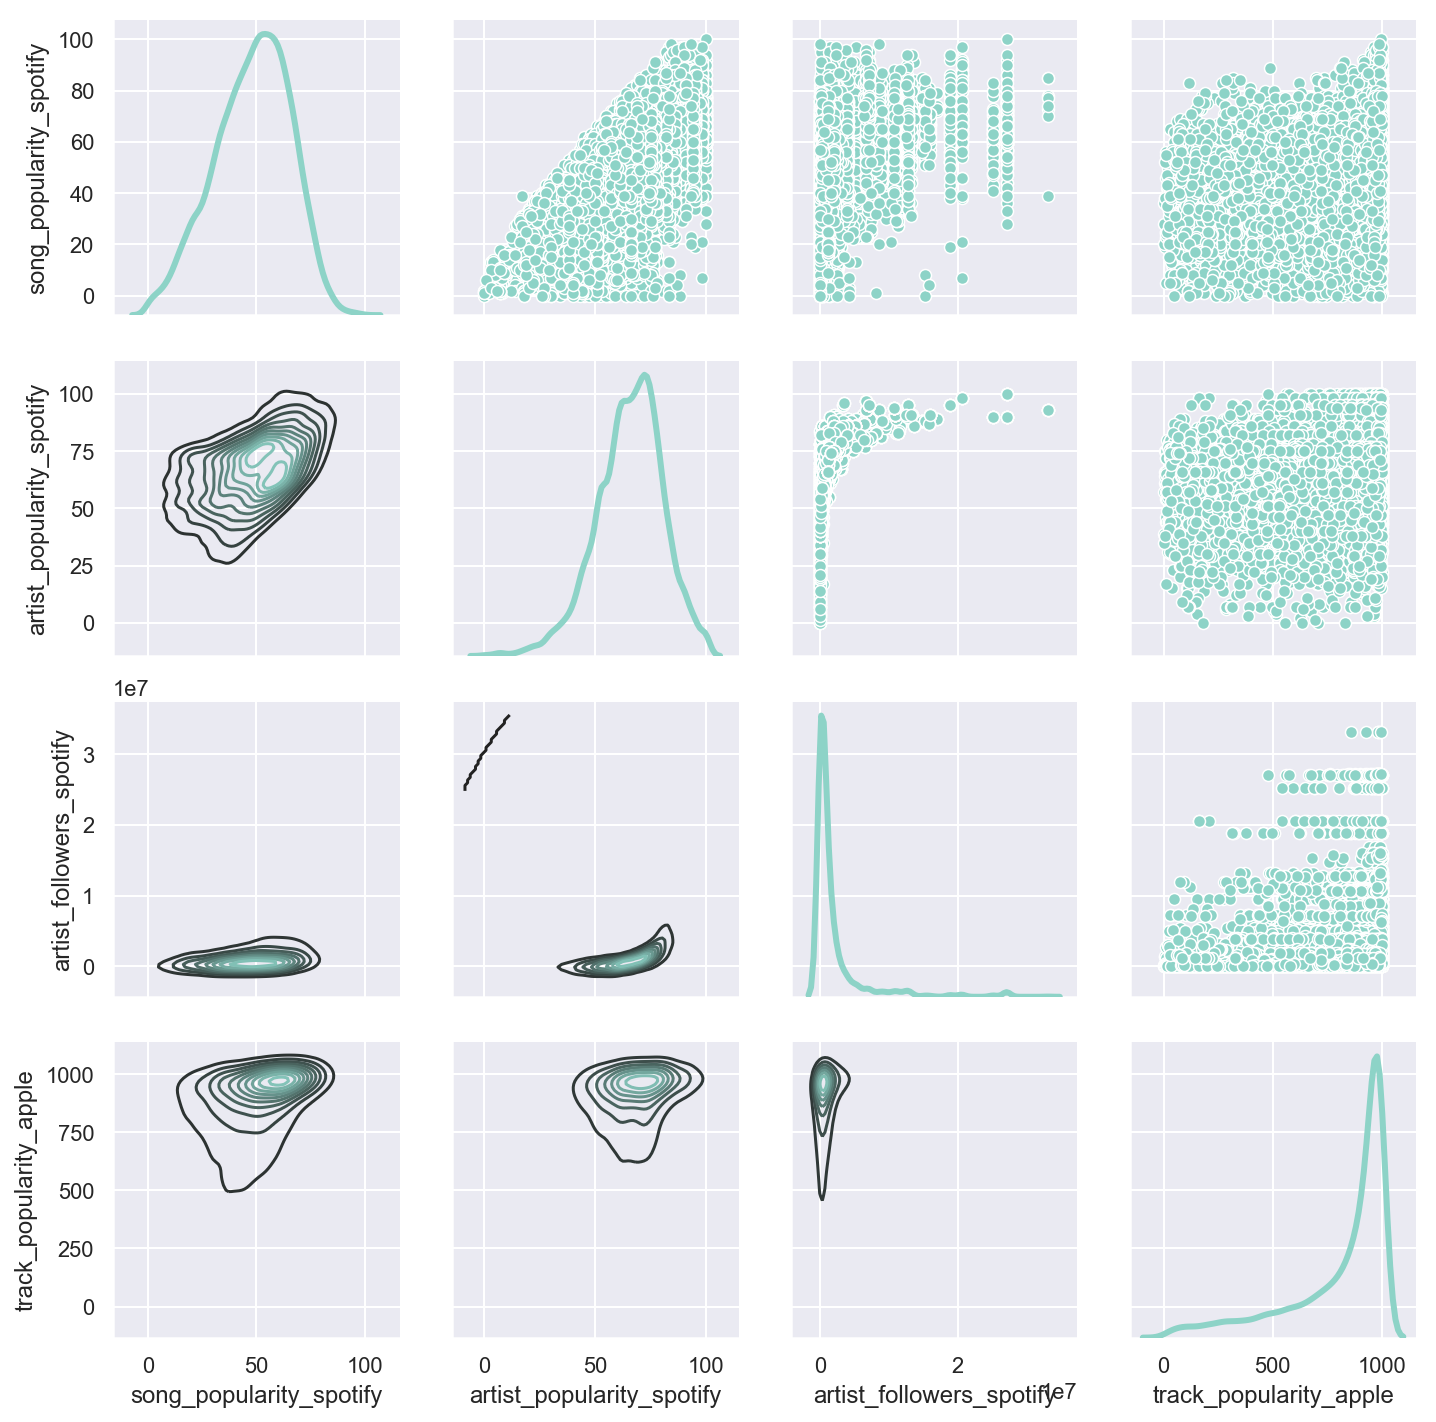

In [96]:
g = sns.PairGrid(df_pop, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

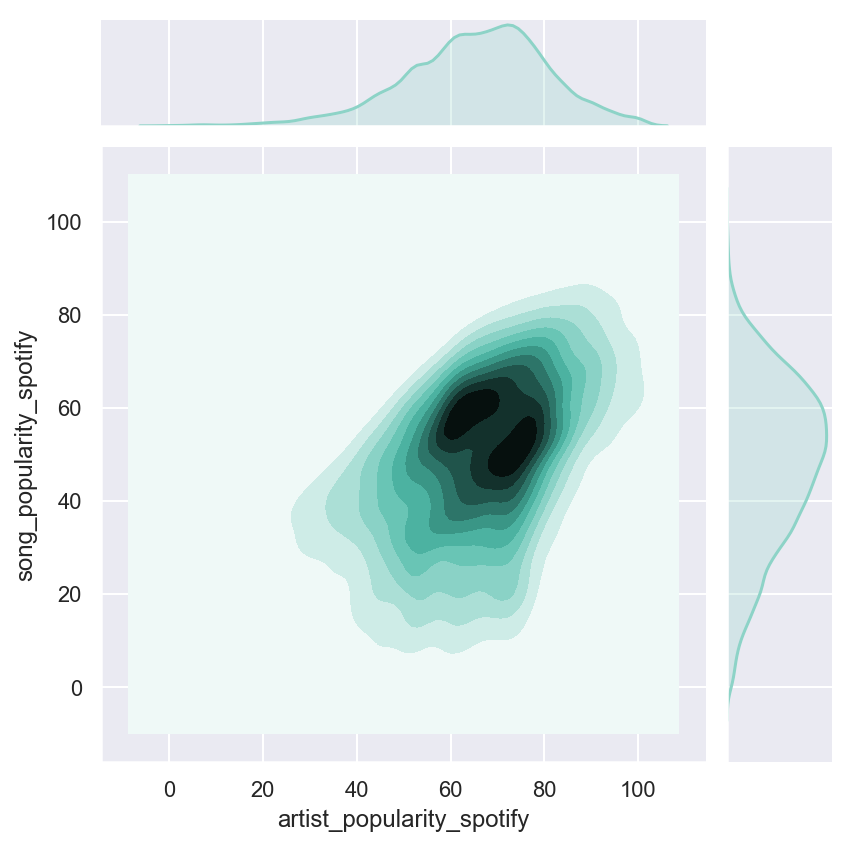

In [97]:
sns.jointplot('artist_popularity_spotify', 'song_popularity_spotify', data=df_pop, kind='kde')

In [100]:
pop_cols = ['isrc','artist_popularity_spotify', 'song_popularity_spotify', 'master_track_release_date']

df_pop2 = all_meta[pop_cols]
df_pop2 = df_pop2.dropna(axis=0)
df_pop2.head()

,isrc,artist_popularity_spotify,song_popularity_spotify,master_track_release_date
24,ITD009500106,45.0,19.0,1995-01-01
25,ATN261877716,57.0,40.0,2018-01-01
26,USMO19582730,77.0,33.0,1995-01-01
27,DKUCA0700015,53.0,58.0,2007-09-18
28,ATN261560203,58.0,34.0,2015-10-02


In [177]:
header = tracks[tracks.playlist_id=='7vDdx1PnBUanKS2pNUBwoY'].playlist_name.unique()
header

array(['LIONEL RICHIE - THE DEFINITIVE COLLECTION'], dtype=object)

In [131]:
test_isrcs = tracks[tracks.playlist_id=='7vDdx1PnBUanKS2pNUBwoY'].isrc.unique()

In [121]:
"best" in str(header[0]).lower()

True

In [102]:
df_pop2['is_a_hit'] = [1 if x<y else 0 for (x,y) in zip(df_pop2.artist_popularity_spotify,df_pop2.song_popularity_spotify)]

In [104]:
df_pop2['is_frontline'] = [1 if x>=frontline_cutoff else 0 for x in df_pop2.master_track_release_date]

In [105]:
df_pop2.head()

,isrc,artist_popularity_spotify,song_popularity_spotify,master_track_release_date,is_a_hit,is_frontline
24,ITD009500106,45.0,19.0,1995-01-01,0,0
25,ATN261877716,57.0,40.0,2018-01-01,0,1
26,USMO19582730,77.0,33.0,1995-01-01,0,0
27,DKUCA0700015,53.0,58.0,2007-09-18,1,0
28,ATN261560203,58.0,34.0,2015-10-02,0,0


In [108]:
df_pop2.is_a_hit.describe()

count    46692.000000
mean         0.099910
std          0.299883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_a_hit, dtype: float64

In [133]:
df_pop2[df_pop2.isrc.isin(test_isrcs)].describe()

,artist_popularity_spotify,song_popularity_spotify,is_a_hit,is_frontline
count,20.000000,20.000000,20.0,20.0
mean,69.750000,48.100000,0.0,0.0
std,2.221308,13.821798,0.0,0.0
min,66.000000,30.000000,0.0,0.0
25%,69.750000,36.750000,0.0,0.0
50%,71.000000,44.500000,0.0,0.0
75%,71.000000,62.750000,0.0,0.0
max,71.000000,71.000000,0.0,0.0


In [87]:
taxonomy_data_playlists[(taxonomy_data_playlists.path.str.contains('Popularity'))&(taxonomy_data_playlists.taggable!='false')]

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
58,Popularity,None,None,None,Charts/Hits,true,99025420-177d-4211-a9ee-c917dbee61dd,Popularity/Charts/Hits
59,Popularity,None,None,None,Deep Cuts/B-Sides,true,6c4ef1c1-b42c-43d6-a142-ff31c7b9868c,Popularity/Deep Cuts/B-Sides
60,Popularity,None,None,None,Greatest Hits/Best Of...,true,0a0bdffd-1883-4e04-ade1-13d20e47822d,Popularity/Greatest Hits/Best Of...
61,Popularity,None,None,None,Rising/New Music,true,75d6c1f4-abe5-425f-8a3f-90b013501a06,Popularity/Rising/New Music


In [223]:
popularity_new_tags = pd.DataFrame(columns=tags_playlists.columns)

In [224]:
playlist_id_list = []
tag_id_list = []
tag_value_list = []

for playlist_id in pl_universe.playlist_id:
    playlist_id_list.append(playlist_id)
    
    isrcs = tracks[tracks.playlist_id==playlist_id].isrc.unique()
    
    header = tracks[tracks.playlist_id==playlist_id].playlist_name.unique()
    
    n_artists = tracks[tracks.playlist_id==playlist_id].nartists.mean()
    
    data = df_pop2[df_pop2.isrc.isin(isrcs)]
    
    if data.shape[0]>0:
        
        if ("best" in str(header[0]).lower())|(n_artists<=3):
            tag_id_list.append('0a0bdffd-1883-4e04-ade1-13d20e47822d')
            tag_value_list.append('Greatest Hits/Best Of...')
        else:
    
            prop_frontline = np.sum(data.is_frontline)/data.shape[0]
            prop_hits = np.sum(data.is_a_hit)/data.shape[0]
    
            if prop_hits >= 0.2:
                if prop_frontline >= 0.65:
                    tag_id_list.append('99025420-177d-4211-a9ee-c917dbee61dd')
                    tag_value_list.append('Charts/Hits')
                else:
                    tag_id_list.append('0a0bdffd-1883-4e04-ade1-13d20e47822d')
                    tag_value_list.append('Greatest Hits/Best Of...')
            elif prop_hits <= 0.05:
                if prop_frontline >= 0.65:
                    tag_id_list.append('75d6c1f4-abe5-425f-8a3f-90b013501a06')
                    tag_value_list.append('Rising/New Music')
                else:
                    tag_id_list.append('6c4ef1c1-b42c-43d6-a142-ff31c7b9868c')
                    tag_value_list.append('Deep Cuts/B-Sides')
            else:
                tag_id_list.append(np.nan)
                tag_value_list.append(np.nan)
                
    else:
        tag_id_list.append(np.nan)
        tag_value_list.append(np.nan)
        
popularity_new_tags['playlist_id']=playlist_id_list
popularity_new_tags['isrc']=''
popularity_new_tags['path']='Popularity'
popularity_new_tags['value']=tag_value_list
popularity_new_tags['taxonomy_node_id']=tag_id_list
popularity_new_tags['source']='Auto'
popularity_new_tags['confidence']=0.9
popularity_new_tags['tagged_entity_type']='StreamingPlaylist'
popularity_new_tags.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,7jnq1oK7S6Xw4eAlh1NvUn,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
1,StreamingPlaylist,4o78SbI3E5nCs6UmlocRha,,Popularity,NaN,NaN,Auto,0.9
2,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
3,StreamingPlaylist,3EEyQ5PYlEjon7cudhhbBL,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
4,StreamingPlaylist,5qIQS9RpyuESMZBCO9FSqT,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9


In [226]:
popularity_new_tags.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,7jnq1oK7S6Xw4eAlh1NvUn,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
1,StreamingPlaylist,4o78SbI3E5nCs6UmlocRha,,Popularity,NaN,NaN,Auto,0.9
2,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
3,StreamingPlaylist,3EEyQ5PYlEjon7cudhhbBL,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9
4,StreamingPlaylist,5qIQS9RpyuESMZBCO9FSqT,,Popularity,Greatest Hits/Best Of...,0a0bdffd-1883-4e04-ade1-13d20e47822d,Auto,0.9


In [227]:
popularity_new_tags.value.value_counts()

Greatest Hits/Best Of...    795
Charts/Hits                 356
Deep Cuts/B-Sides           169
Rising/New Music             20
Name: value, dtype: int64

In [228]:
popularity_new_tags = popularity_new_tags.dropna(axis=0)

In [229]:
popularity_new_tags.shape

(1340, 8)

In [230]:
popularity_new_tags.to_gbq('playlist_sequencing.new_tags_popularity', project_id='umg-comm-tech-dev',
                               if_exists='replace')

1it [00:06,  6.19s/it]


### Genres

In [142]:
taxonomy_data_playlists[(taxonomy_data_playlists.path.str.contains('Genre'))&(taxonomy_data_playlists.taggable!='false')&(taxonomy_data_playlists.lvl_1.isnull())]

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
1,Genre,None,None,Characterized by a loose narrative lyrical sty...,Blues,true,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues
2,Genre,None,None,Traditional Western art music. Though wide-ran...,Classical,true,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical
3,Genre,None,None,Characterized by the use of guitar and twangy ...,Country,true,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country
4,Genre,None,None,Created primarily by electronic instruments an...,Electronic,true,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic
5,Genre,None,None,Refers both to the traditional folk music of t...,Folk,true,da8a990f-9398-483d-8284-80d01c4ef634,Genre/Folk
6,Genre,None,None,Sung Christian music with roots in traditional...,Gospel,true,f814d27a-2e75-48a7-b2aa-731e6e0ac95a,Genre/Gospel
7,Genre,None,None,Typically features rapped vocals (emphasis on ...,Hip-Hop,true,c9827769-5b34-4403-8921-eb103f322fbf,Genre/Hip-Hop
8,Genre,None,None,Wide-ranging genre characterized by the use of...,Jazz,true,a6e9ef88-0f2e-4624-9275-34fdcfaea7b2,Genre/Jazz
9,Genre,None,None,Umbrella genre that encompasses most music fro...,Latin,true,e31d4b6d-eadb-4ddd-a97f-37137642f571,Genre/Latin
10,Genre,None,None,"Popular music, for lack of a better term. Cons...",Pop,true,fe067718-5430-4128-ab4f-7d571e2b4de9,Genre/Pop


In [153]:
taxonomy_data_playlists[taxonomy_data_playlists.lvl_1=='Electronic']

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
364,Genre,Electronic,None,Emerged among Chicago club DJs in the early 19...,House,true,34f99db6-5afb-4289-8178-1dfe3b3f82be,Genre/Electronic/House
365,Genre,Electronic,None,Developed in the late 1980s UK rave scene and ...,Trance,true,9e3d17b4-ac15-4078-8aaf-bc9d1a039ea7,Genre/Electronic/Trance
366,Genre,Electronic,None,"Laid-back, dreamy, and hypnotic electronic mus...",Downtempo,true,e74aa6d4-b314-4d1c-be56-da925b0467bf,Genre/Electronic/Downtempo
367,Genre,Electronic,Downtempo,Foregrounds tone and atmosphere over structure...,Ambient,true,19cf6959-b395-40a0-aca3-71f7a2fb4757,Genre/Electronic/Downtempo/Ambient
368,Genre,Electronic,None,Prominently features drum breaks sampled from ...,Breakbeat,true,39ea24b7-2cfa-4cb2-9c59-562d12307866,Genre/Electronic/Breakbeat
369,Genre,Electronic,None,"Inspired by and similar to house music, but is...",Techno,true,88da1e81-4967-451e-b8f9-2d3e3116e600,Genre/Electronic/Techno
370,Genre,Electronic,None,"Characterized by fast tempos (160 BPM and up),...",Hardcore,true,59b8e511-2fe5-47c6-b47b-da6811034679,Genre/Electronic/Hardcore


In [161]:
genre_cols = ['isrc', 'genre_apple', 'parent_genre_apple', 'genre_r2', 'artist_genres_spotify']

In [162]:
df_genres = all_meta[genre_cols]

In [146]:
df_genres.describe()

,genre_apple,parent_genre_apple,genre_r2,artist_genres_spotify
count,76665,76664,59273,47752
unique,196,41,9,4431
top,Pop,Pop,Pop,
freq,14102,14323,15056,4044


In [147]:
df_genres.parent_genre_apple.unique()

array([None, 'Christian & Gospel', 'Reggae', 'Alternative', 'Brazilian',
       'Pop', 'Hip Hop/Rap', 'World', 'Electronic', 'Folk', 'R&B/Soul',
       'Jazz', 'Rock', 'Anime', 'Blues', 'Dance', 'J-Pop', 'Latin',
       'Classical', 'Easy Listening', 'Vocal', 'Arabic', 'Comedy',
       'Disney', 'Indian', 'African', 'Turkish', 'Country', 'Holiday',
       'Movies', 'Karaoke', 'New Age', "Children's Music", 'Soundtrack',
       'Singer/Songwriter', 'French Pop', 'German Pop', 'German Folk',
       'Spoken Word', 'Instrumental', 'Inspirational',
       'Fitness & Workout', nan], dtype=object)

In [154]:
apple_tag_genres_dict = {
    'Christian & Gospel':'Gospel',
    'Reggae':'Reggae',
    'Alternative':'Rock',
    'Brazilian':'Latin',
    'Pop':'Pop',
    'Hip Hop/Rap':'Hip-Hop',
    'World':'World',
    'Electronic':'Electronic', 
    'Folk':'Folk', 
    'R&B/Soul':'R&B',
    'Jazz':'Jazz', 
    'Rock':'Rock', 
    #'Anime', 
    'Blues':'Blues', 
    'Dance':'Electronic', 
    'J-Pop':'Pop', 
    'Latin':'Latin',
    'Classical':'Classical', 
    #'Easy Listening', 
    #'Vocal', 
    #'Arabic', 
    #'Comedy',
    #'Disney', 
    #'Indian', 
    #'African', 
    #'Turkish', 
    'Country':'Country', 
    #'Holiday',
    #'Movies', 
    #'Karaoke', 
    #'New Age', 
    #"Children's Music", 
    #'Soundtrack',
    #'Singer/Songwriter', 
    'French Pop':'Pop', 
    'German Pop':'Pop', 
    'German Folk':'Folk',
    'Spoken Word':'Spoken' 
    #'Instrumental', 
    #'Inspirational',
    #'Fitness & Workout'
}

In [157]:
'Dance' in apple_tag_genres_dict.keys()

True

In [163]:
df_genres['taxonomy_genre'] = [apple_tag_genres_dict[x] if x in apple_tag_genres_dict.keys() else np.nan for x in df_genres.parent_genre_apple]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
df_genres = df_genres.dropna(axis=0)
df_genres.head()

,isrc,genre_apple,parent_genre_apple,genre_r2,artist_genres_spotify,taxonomy_genre
148,USUM71320295,CCM,Christian & Gospel,Classic,"anthem worship,ccm,christian alternative rock,...",Gospel
149,USFF11200081,CCM,Christian & Gospel,Classic,"ccm,christian alternative rock,christian hip h...",Gospel
150,USFF11200077,CCM,Christian & Gospel,Classic,"ccm,christian alternative rock,christian hip h...",Gospel
151,USFF11200083,CCM,Christian & Gospel,Classic,"ccm,christian alternative rock,christian hip h...",Gospel
153,US3271100430,CCM,Christian & Gospel,Classic,southern gospel,Gospel


In [169]:
df_genres.shape

(42040, 6)

In [180]:
prop_test = df_genres[df_genres.isrc.isin(test_isrcs)].taxonomy_genre.value_counts()/df_genres[df_genres.isrc.isin(test_isrcs)].shape[0]

In [185]:
list(prop_test)

[0.5263157894736842,
 0.3684210526315789,
 0.05263157894736842,
 0.05263157894736842]

In [188]:
### Check what is the average distribution of genres in playlists

test_df = pd.DataFrame(columns=['playlist_id','genres_count','genres_prop','genres'])

playlist_id_list = []
genres_count_list = []
genres_prop_list = []
genres_list = []

for playlist_id in pl_universe.playlist_id:
    playlist_id_list.append(playlist_id)
    isrcs = tracks[tracks.playlist_id==playlist_id].isrc.unique()
    genres = df_genres[df_genres.isrc.isin(isrcs)]
    
    if genres.shape[0]>0:
        genres_count=len(genres.taxonomy_genre.unique())
        
        genres_prop = genres.taxonomy_genre.value_counts()/genres.shape[0]
        
        genres_count_list.append(genres_count)
        genres_prop_list.append(list(genres_prop))
        genres_list.append(list(genres_prop.index))
    else:
        genres_count_list.append(np.nan)
        genres_prop_list.append(np.nan)
        genres_list.append(np.nan)
        
test_df['playlist_id']=playlist_id_list
test_df['genres_count']=genres_count_list
test_df['genres_prop']=genres_prop_list
test_df['genres']=genres_list

test_df.head()

,playlist_id,genres_count,genres_prop,genres
0,7jnq1oK7S6Xw4eAlh1NvUn,NaN,NaN,NaN
1,4o78SbI3E5nCs6UmlocRha,5.0,"[0.8108108108108109, 0.16216216216216217, 0.00...","[Hip-Hop, Pop, World, Rock, R&B]"
2,7vDdx1PnBUanKS2pNUBwoY,4.0,"[0.5263157894736842, 0.3684210526315789, 0.052...","[R&B, Pop, Blues, Rock]"
3,3EEyQ5PYlEjon7cudhhbBL,2.0,"[0.9047619047619048, 0.09523809523809523]","[Rock, Pop]"
4,5qIQS9RpyuESMZBCO9FSqT,NaN,NaN,NaN


In [173]:
test_df.genres_count.value_counts()

2.0     393
1.0     289
3.0     264
4.0     241
5.0     206
6.0     137
7.0      49
8.0      22
9.0       8
10.0      4
12.0      1
Name: genres_count, dtype: int64

In [205]:
gen = test_df[test_df.playlist_id=='25KNLNLlTEQJYgpvNGZLYd'].genres.iloc[0][0]

In [209]:
taxonomy_data_playlists[taxonomy_data_playlists.name==gen].taxonomynodeid

10    fe067718-5430-4128-ab4f-7d571e2b4de9
Name: taxonomynodeid, dtype: object

In [252]:
test_df = test_df.fillna(np.nan)

In [265]:
test_df[test_df.playlist_id=='7jnq1oK7S6Xw4eAlh1NvUn'].genres_count.isnull()[0]==True

True

In [216]:
limit = 1/len(test_df[test_df.playlist_id=='4o78SbI3E5nCs6UmlocRha'].genres_prop.iloc[0])

In [220]:
props = test_df[test_df.playlist_id=='4o78SbI3E5nCs6UmlocRha'].genres_prop.iloc[0]
gens = test_df[test_df.playlist_id=='4o78SbI3E5nCs6UmlocRha'].genres.iloc[0]

In [221]:
for prop, gen in zip(props,gens):
    if prop >= limit:
        print(prop)
        print(gen)

0.8108108108108109
Hip-Hop


In [238]:
test_df[test_df.playlist_id=='4o78SbI3E5nCs6UmlocRha'].genres_prop.iloc[0].isnull()

AttributeError: 'list' object has no attribute 'isnull'

In [274]:
taxonomy_data_playlists[taxonomy_data_playlists.name=='Hip-Hop'].taxonomynodeid.iloc[0]

'c9827769-5b34-4403-8921-eb103f322fbf'

In [270]:
genre_new_tags = pd.DataFrame(columns=tags_playlists.columns)

In [275]:
playlist_id_list = []
tag_id_list = []
tag_value_list = []

for playlist_id in test_df.playlist_id:
    
    data = test_df[test_df.playlist_id==playlist_id]
    count_genres = data.genres_count.iloc[0]
    
    if count_genres==1:
        playlist_id_list.append(playlist_id)
        
        genre = data.genres.iloc[0][0]
        taxonomy_id = taxonomy_data_playlists[taxonomy_data_playlists.name==gen].taxonomynodeid.iloc[0]
        
        tag_value_list.append(genre)
        tag_id_list.append(taxonomy_id)
        
    elif count_genres>1:
        limit = 1/len(data.genres_prop.iloc[0])
        
        props = data.genres_prop.iloc[0]
        gens = data.genres.iloc[0]
        for prop, gen in zip(props,gens):
            if prop >= limit:
                
                taxonomy_id = taxonomy_data_playlists[taxonomy_data_playlists.name==gen].taxonomynodeid.iloc[0]
                
                playlist_id_list.append(playlist_id)
                tag_value_list.append(gen)
                tag_id_list.append(taxonomy_id)
        
    else:
        playlist_id_list.append(playlist_id)
        tag_value_list.append(np.nan)
        tag_id_list.append(np.nan)
    
        
genre_new_tags['playlist_id']=playlist_id_list
genre_new_tags['isrc']=''
genre_new_tags['path']='Genre'
genre_new_tags['value']=tag_value_list
genre_new_tags['taxonomy_node_id']=tag_id_list
genre_new_tags['source']='Auto'
genre_new_tags['confidence']=0.9
genre_new_tags['tagged_entity_type']='StreamingPlaylist'
genre_new_tags.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,7jnq1oK7S6Xw4eAlh1NvUn,,Genre,NaN,NaN,Auto,0.9
1,StreamingPlaylist,4o78SbI3E5nCs6UmlocRha,,Genre,Hip-Hop,c9827769-5b34-4403-8921-eb103f322fbf,Auto,0.9
2,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Genre,R&B,3ffa3c14-6b46-4295-9618-77b1de08c9b6,Auto,0.9
3,StreamingPlaylist,7vDdx1PnBUanKS2pNUBwoY,,Genre,Pop,fe067718-5430-4128-ab4f-7d571e2b4de9,Auto,0.9
4,StreamingPlaylist,3EEyQ5PYlEjon7cudhhbBL,,Genre,Rock,fe776e3d-dbcb-424e-b70d-9487131080e6,Auto,0.9


In [276]:
genre_new_tags.tail()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
2136,StreamingPlaylist,7EyFIDuFRJjZbYAhMIwpMu,,Genre,Pop,fe067718-5430-4128-ab4f-7d571e2b4de9,Auto,0.9
2137,StreamingPlaylist,7EyFIDuFRJjZbYAhMIwpMu,,Genre,Rock,fe776e3d-dbcb-424e-b70d-9487131080e6,Auto,0.9
2138,StreamingPlaylist,5JoDbclY8x7d0SkKq3FR1L,,Genre,Rock,fe776e3d-dbcb-424e-b70d-9487131080e6,Auto,0.9
2139,StreamingPlaylist,5JoDbclY8x7d0SkKq3FR1L,,Genre,Pop,fe067718-5430-4128-ab4f-7d571e2b4de9,Auto,0.9
2140,StreamingPlaylist,3VsQLGsSRXwIZFPjhCQYuP,,Genre,Pop,fe067718-5430-4128-ab4f-7d571e2b4de9,Auto,0.9


In [277]:
genre_new_tags = genre_new_tags.dropna(axis=0)
genre_new_tags.shape

(2100, 8)

In [278]:
genre_new_tags.to_gbq('playlist_sequencing.new_tags_genre', project_id='umg-comm-tech-dev',
                               if_exists='replace')

1it [00:04,  4.47s/it]
